# Preprocessing

This note we'll preprocessing our dataset to extract the labels to feed our CNN. The dataset can be find [here](https://susanqq.github.io/UTKFace/).

<img src="images/dataset.png" alt="UTKFace Dataset" width="740" height="180" />


After extract the zip file move all images to folder **data/**


## UTKFace 

UTKFace dataset is a large-scale face dataset with long age span (range from **0 to 116** years old). The dataset consists of over **20,000** face images with annotations of **age**, **gender**, and **ethnicity**. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc. 

## Setup

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from glob import glob
import re
%matplotlib inline

## Data Input

In [59]:
def save(obj, name):
    with open(name, 'wb') as f:
        pkl.dump(obj, f, pkl.HIGHEST_PROTOCOL)

def load(name):
    with open(name, 'rb') as f:
        return pkl.load(f)

def extract_labels(_list_images):
    '''[age]_[gender]_[race]_[date&time]'''
    _list_ret = []
    for name in _list_images:
        features = name.split('_')
        _list_ret.append((features[0], features[1], features[2]))
    return _list_ret

In [60]:
DATA_PATH = 'data/'
files = glob(DATA_PATH+'*.jpg')
images = [re.sub('data/', '', re.sub(r'.jpg.chip.jpg', '', x)) for x in files]
labels = extract_labels(images)
print(labels[np.random.randint(0, len(images))])
print(len(images))

('6', '1', '0')
23708


In [54]:
def images_to_pkl(files, labels, pos, name, max_batch):
    X = []
    y = []
    batch_index = 1
    for index, (path, lbl) in enumerate(zip(files, labels)):
        image = Image.open(path)
        data_x = np.array(image, dtype=np.uint8)
        data_y = lbl[pos]
        X.append(data_x)
        y.append(data_y)
        if index == max_batch*batch_index:
            save({'X': X, 'y': y }, 'data/{:}/0{:}.pkl'.format(name, batch_index))
            X = []
            y = []
            batch_index += 1
    # remaining batch
    if len(X) >= 0:
        save({'X': X, 'y': y }, 'data/{:}/0{:}.pkl'.format(name, batch_index))
        
def describe_data(labels, data):
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, data, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Length')
    plt.title('Data')
    plt.show()

### Data Gender

In [23]:
images_to_pkl(files, labels, 1, 'gender', 5000)

In [61]:
gender_data = glob('data/gender/*.pkl')
batch_gender = load(gender_data[np.random.randint(len(gender_data))])
gender_x, gender_y = len(batch_gender['X']), len(batch_gender['y'])
print(gender_data)
print(gender_x, gender_y)
print(batch_gender['X'][np.random.randint(gender_x)])
print(batch_gender['y'][np.random.randint(gender_y)])

['data/gender/02.pkl', 'data/gender/03.pkl', 'data/gender/01.pkl', 'data/gender/04.pkl', 'data/gender/05.pkl']
5000 5000
[[[75 57 57]
  [70 52 52]
  [66 48 48]
  ...
  [ 0  0  0]
  [ 0  1  0]
  [ 0  2  1]]

 [[72 54 54]
  [70 52 52]
  [68 50 50]
  ...
  [ 0  0  0]
  [ 0  1  0]
  [ 0  2  1]]

 [[69 51 51]
  [70 52 52]
  [72 54 54]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  2  1]]

 ...

 [[11 12  7]
  [ 9 10  5]
  [ 5  5  3]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 1  1  1]]

 [[ 8  9  4]
  [ 6  7  2]
  [ 4  4  2]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 7  8  3]
  [ 6  7  2]
  [ 4  4  2]
  ...
  [ 1  1  1]
  [ 2  2  2]
  [ 2  2  2]]]
1


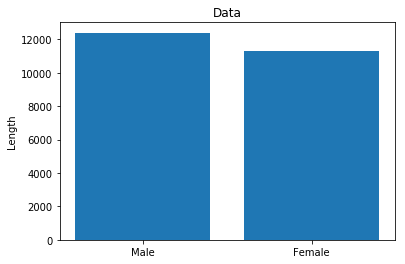

[12391, 11317]


In [63]:
count = [0,0]
for file in gender_data:
    data = load(file)
    if data != None:
        for label in data['y']:
            if int(label) == 0:
                count[0] += 1
            else:
                count[1] += 1
describe_data(('Male', 'Female'), count)
print(count)